In [1]:
# Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Loading our dataset.

df = pd.read_csv("Salaries.csv")
df.head()

,rank,discipline,phd,service,sex,salary
0,Prof,B,56,49,Male,186960
1,Prof,A,12,6,Male,93000
2,Prof,A,23,20,Male,110515
3,Prof,A,40,31,Male,131205
4,Prof,B,20,18,Male,104800


In [3]:
# Checking whether the dataset contains any null values or not.

df.isnull().sum()

rank          0
discipline    0
phd           0
service       0
sex           0
salary        0
dtype: int64

In [4]:
# Dropping features/columns that cannot be used for training the model.

df = df.drop(['sex'],axis=1)

In [5]:
df.head()

,rank,discipline,phd,service,salary
0,Prof,B,56,49,186960
1,Prof,A,12,6,93000
2,Prof,A,23,20,110515
3,Prof,A,40,31,131205
4,Prof,B,20,18,104800


In [6]:
# Converting the categorical data into numeric data.

df1 = pd.get_dummies(df, columns=['rank'])
df1['discipline'].replace({'A':1, 'B':0}, inplace=True)
df1


,discipline,phd,service,salary,rank_AssocProf,rank_AsstProf,rank_Prof
0,0,56,49,186960,0,0,1
1,1,12,6,93000,0,0,1
2,1,23,20,110515,0,0,1
3,1,40,31,131205,0,0,1
4,0,20,18,104800,0,0,1
...,...,...,...,...,...,...,...
73,0,18,10,105450,0,0,1
74,0,19,6,104542,1,0,0
75,0,17,17,124312,0,0,1
76,1,28,14,109954,0,0,1


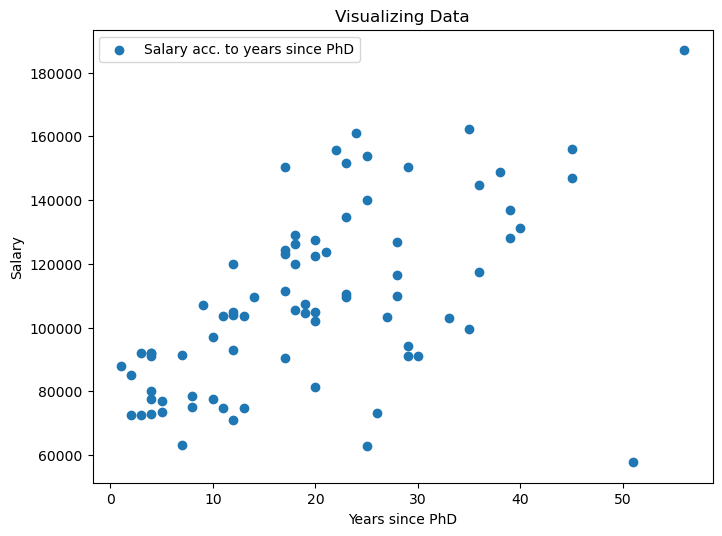

In [7]:
# Visualizing different features to have an idea of the variance in the data.
A1 = df1['phd']
B1 = df1['salary']

# Plotting a scatter graph using MATPLOTLIB.
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('Visualizing Data')
plt.scatter(A1,B1, label='Salary acc. to years since PhD')
plt.xlabel('Years since PhD')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.show()

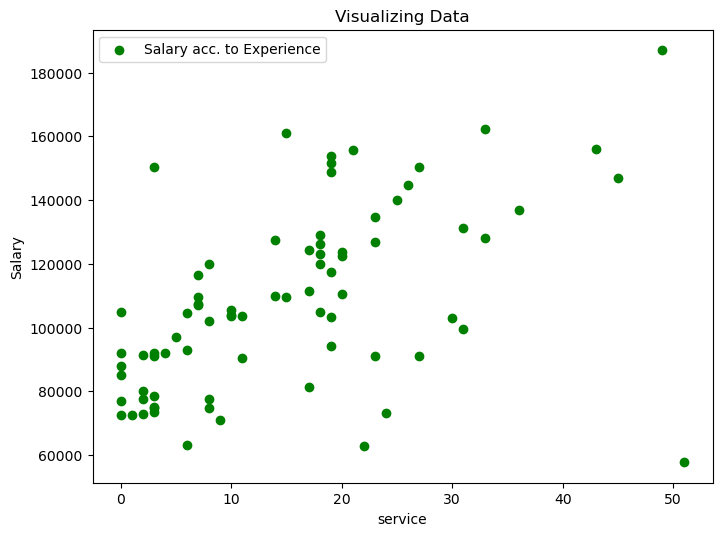

In [8]:
# Visualizing different features to have an idea of the variance in the data.
A2 = df1['service']
B2 = df1['salary']

# Plotting a scatter graph using MATPLOTLIB.
plt.rcParams.update({'figure.figsize':(8,6), 'figure.dpi':100})
plt.title('Visualizing Data')
plt.scatter(A2,B2, c='green', label='Salary acc. to Experience')
plt.xlabel('service')
plt.ylabel('Salary')
plt.legend(loc='upper left')
plt.show()

In [9]:
# Defining the independent and dependent variables.
x = df1.drop(columns=['salary'])
y = df1['salary']

# Splitting our dataset in training and testing data.
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [10]:
# Defining our model.
lr = LinearRegression()

# Training our Model.
lr.fit(x_train,y_train)

LinearRegression()

In [11]:
# Predicting the testing data.
y_pred = lr.predict(x_test)

In [12]:
# Generating our R squared score.
r2 = r2_score(y_test,y_pred)
r2

0.43039328194159776

In [13]:
y_test.head()

74    104542
36    146856
18    107300
5     122400
51    127512
Name: salary, dtype: int64

In [14]:
y_pred[:5]

array([101902.17174448, 143867.38206756, 111341.86215436, 110957.59600511,
       130950.28066812])

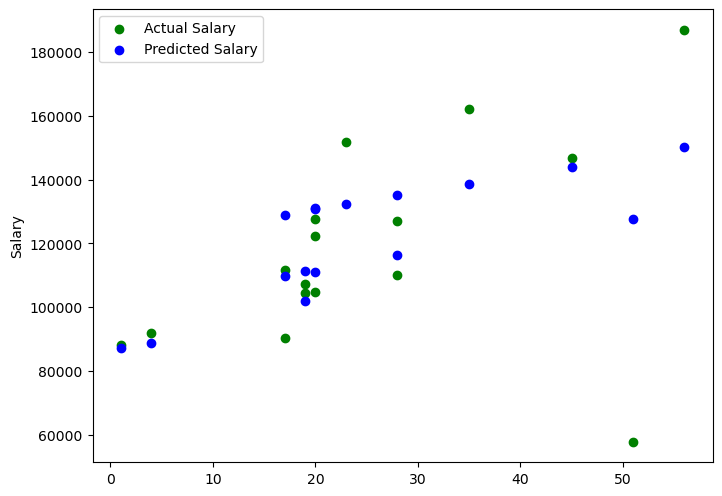

In [15]:
# Plotting the actual and predicted salary for comparison.
Q = x_test['phd']
plt.scatter(Q,y_test, c='green', label='Actual Salary')
plt.scatter(Q,y_pred, c='blue', label='Predicted Salary')
plt.legend(loc='upper left')
plt.ylabel('Salary')
plt.show()